<a href="https://colab.research.google.com/github/wraseonyana/Omdena/blob/master/Topic_modeling_scientific_papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modelling on academic papers



Inspired by Jave's notebook:Literature topics and https://www.kaggle.com/mobassir/mining-covid-19-scientific-papers

In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 11.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a80674b05ab8d57374d2d2221b0952a8da77971126d7e5d92818e03ba6a47611
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=59bb29219c657f5a02e1da745010de3bca7c84a4f68f281ae6fd6e3634f560dc
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


**IMPORTS**

In [3]:


import numpy as np 
import pandas as pd 
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


import os
n = 1000



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!pip install  tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 39kB/s 
     |████████████████████████████████| 3.8MB 27.2MB/s 
     |████████████████████████████████| 512kB 37.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=785a8ba06274e0d243b75f04dfa9df6e632e49acebcc1e7bf2496c00d4bf9f1c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

In [5]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.0MB/s 


In [6]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
    

--2020-06-09 16:34:35--  https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404261442 (386M) [application/zip]
Saving to: ‘cased_L-12_H-768_A-12.zip’

cased_L-12_H-768_A- 100%[===================>] 385.53M   174MB/s    in 2.2s    

2020-06-09 16:34:38 (174 MB/s) - ‘cased_L-12_H-768_A-12.zip’ saved [404261442/404261442]



In [7]:
!unzip cased_L-12_H-768_A-12.zip

Archive:  cased_L-12_H-768_A-12.zip
   creating: cased_L-12_H-768_A-12/
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: cased_L-12_H-768_A-12/vocab.txt  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: cased_L-12_H-768_A-12/bert_config.json  


In [8]:
pip install pdfminer

     |████████████████████████████████| 4.2MB 78kB/s 
     |████████████████████████████████| 13.7MB 25.1MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-cp36-none-any.whl size=6140085 sha256=1e3a79a8119b169b48070eb05c81aedf385d4f378612bb14f83fb60ce6a40175
  Stored in directory: /root/.cache/pip/wheels/e1/00/af/720a55d74ba3615bb4709a3ded6dd71dc5370a586a0ff6f326
Successfully built pdfminer


In [9]:
import tensorflow as tf
tf.VERSION


'1.15.0'

In [0]:

import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling
import tensorflow as tf
import numpy as np
import itertools
from io import StringIO
from pdfminer.pdfparser import PDFParser
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfpage import PDFPage



# NLTK Stop words

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results', 
                   'purpose', 'materials', 'discussions','methodology','result analysis','copyright',
    'org', 'https','et','al','author','figure','table','rights','reserved','permission','use','used','using',
    'biorxiv','medrxiv','license','fig','fig.','al.','Elsevier','PMC','CZI','94e100','85e93'])

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
filepath = '/content/drive/My Drive/Colab Notebooks/Academic Papers/'
files = os.listdir('/content/drive/My Drive/Colab Notebooks/Academic Papers/')
files



['01. Household financial debt and its impact on mental and physical health.pdf',
 '02. Student borrowing and the mental health of young adults in the United States.pdf',
 '03. Effect of medical student debt on mental health.pdf',
 '04. Student debt and its relation to student mental health.pdf',
 '11. Student debt and wellbeing a research agenda.pdf',
 '05. CentreforMentalHealth_MissedOpportunities_16-25years.pdf',
 '16. The impact of money worries on childrens mental health.pdf',
 '09. Debt, income and mental disorder in the.pdf',
 '14. The relationship between personal debt and mental health.pdf',
 '15. The relationship between personal unsecured debt and mental and.pdf',
 '06. College Students and Financial Distress.pdf',
 '12. Student Loan Debt and Financial Stress.pdf',
 '10. Personal debt and suicidal ideation.pdf',
 '07. Debt and Health A Briefing.pdf',
 '13. The high price of debt.pdf',
 '08. Debt common mental disorders and mental health service use.pdf',
 '17. Associations B

In [0]:
# convert type and do simple cleanup
def clean_text(text: bytes) -> str:
    # new_text = text.decode("utf-8", errors="ignore")
    new_text = text.replace("\n", " ")
    new_text = new_text.replace("\r", " ")
    return new_text

In [0]:
# helper fxn implementing pdfminer.six module to parse pdf content
def get_pdf_text(filepath: str) -> str:
    output_string = StringIO()
    with open(filepath, "rb",) as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)

    return output_string.getvalue()

In [17]:
# build pd dataframe using filenames and extracted content, using clean_text in the process
dict_ = {"paper_filename": [], "content": []}

for filename in files:
    if ".pdf" in filename:
        text = get_pdf_text(os.path.join(filepath, filename))

    text = clean_text(text)
    dict_["paper_filename"].append(filename)
    dict_["content"].append(text)

df = pd.DataFrame(dict_, columns=["paper_filename", "content"])
df.head()

,paper_filename,content
0,01. Household financial debt and its impact on...,Social Science & Medicine 91 (2013) 94e100 Co...
1,02. Student borrowing and the mental health of...,Social Science & Medicine 124 (2015) 85e93 Co...
2,03. Effect of medical student debt on mental h...,Open access Research Effect of medical stud...
3,04. Student debt and its relation to student m...,Journal of Further and Higher Education ISSN:...
4,11. Student debt and wellbeing a research agen...,Kōtuitui: New Zealand Journal of Social Scienc...


# frequent words in content

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

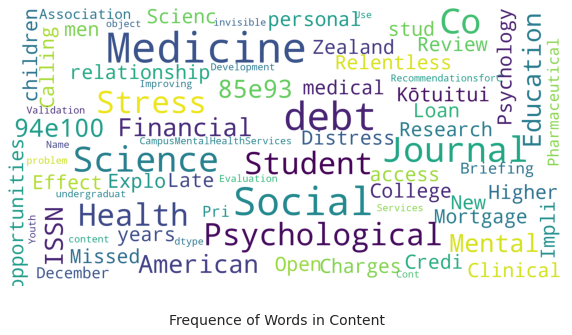

In [19]:
show_wordcloud(df['content'], title = 'Frequence of Words in Content')

# Convert content to list

In [0]:

df = df.content.dropna()
data = df.values.tolist()

**The function below converts sentences to words using gensim**

In [21]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[:1])

[['social', 'science', 'medicine', 'contents', 'lists', 'available', 'at', 'sciverse', 'sciencedirect', 'social', 'science', 'medicine', 'the', 'high', 'price', 'of', 'debt', 'household', 'ﬁnancial', 'debt', 'and', 'its', 'impact', 'on', 'mental', 'and', 'physical', 'health', 'elizabeth', 'sweet', 'arijit', 'nandi', 'emma', 'adam', 'thomas', 'mcdade', 'northwestern', 'university', 'feinberg', 'school', 'of', 'medicine', 'department', 'of', 'medical', 'social', 'sciences', 'abbott', 'hall', 'lake', 'shore', 'drive', 'suite', 'chicago', 'il', 'usa', 'mcgill', 'university', 'institute', 'for', 'health', 'and', 'social', 'policy', 'meredith', 'charles', 'house', 'pine', 'ave', 'west', 'montreal', 'quebec', 'canada', 'northwestern', 'university', 'school', 'of', 'education', 'and', 'social', 'policy', 'annenberg', 'hall', 'room', 'campus', 'drive', 'evanston', 'il', 'usa', 'northwestern', 'university', 'cells', 'to', 'society', 'the', 'center', 'on', 'social', 'disparities', 'and', 'health'

# Build the bigram and trigram models using gensim

In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['social_science_medicine', 'contents', 'lists', 'available_at', 'sciencedirect', 'social_science_medicine', 'sick', 'of', 'our', 'loans', 'student', 'borrowing', 'and', 'the', 'mental_health', 'of', 'young_adults', 'in', 'the', 'united_states', 'katrina', 'walsemann', 'gilbert', 'gee', 'danielle', 'gentile', 'department', 'of', 'health', 'promotion', 'education', 'and', 'behavior', 'arnold', 'school', 'of', 'public_health', 'university', 'of', 'south', 'carolina', 'discovery', 'greene', 'street', 'room', 'columbia', 'sc', 'usa', 'department', 'of', 'community', 'health', 'sciences', 'fielding', 'school', 'of', 'public_health', 'university', 'of', 'california', 'los_angeles', 'charles', 'young', 'drive', 'south', 'room', 'los_angeles', 'ca', 'usa', 'article_history', 'available_online', 'november', 'keywords', 'student_loans', 'debt', 'education', 'psychological_functioning', 'student_loans', 'are', 'increasingly', 'important', 'and', 'commonplace', 'especially', 'among', 'recent', 'co

# Define functions for stopwords, bigrams, trigrams and lemmatization

In [0]:


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [24]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

['social_science', 'medicine', 'content', 'list', 'available', 'sciencedirect', 'social_science', 'medicine', 'sick', 'loan', 'student', 'borrowing', 'promotion', 'education', 'behavior', 'field', 'school', 'young', 'room', 'ca', 'article', 'history', 'keyword', 'debt', 'education', 'increasingly', 'important', 'commonplace', 'especially', 'recent', 'cohort', 'united_state', 'loan', 'facilitate', 'acquisition', 'human', 'capital', 'form', 'may', 'also', 'lead', 'stress', 'worry', 'relate', 'repayment', 'study', 'investigate', 'question', 'association', 'borrow', 'course', 'school', 'psychological_functioning', 'individual', 'association', 'annual_student', 'among_currently', 'enrol', 'college', 'student', 'also', 'examine', 'relationship', 'varied', 'history', 'year', 'educational_attainment', 'loan', 'analyze', 'datum', 'survey', 'youth', 'sample', 'analysis', 'employ', 'multivariate_linear', 'regression', 'model', 'associate', 'function', 'adjust', 'covariate', 'multivariate_linear',

In [25]:

print(data_lemmatized[:1])

[['social_science', 'medicine', 'content', 'list', 'available', 'sciverse', 'sciencedirect', 'social_science', 'medicine', 'high', 'price', 'debt', 'household', 'ﬁnancial', 'debt', 'impact', 'mental', 'physical', 'education', 'room', 'campus', 'cell', 'society', 'center', 'article', 'history', 'may', 'keywords', 'financial', 'debt', 'health', 'household', 'ﬁnancial', 'debt', 'rise', 'dramatically', 'recent_year', 'evidence', 'debt', 'associate', 'relationship', 'health', 'outcome', 'relatively', 'unknown', 'investigate', 'association', 'multiple_indice', 'ﬁnancial', 'debt', 'general', 'health', 'outcome', 'respondent', 'longitu', 'dinal', 'study', 'health', 'ﬁnding', 'show', 'report', 'high', 'ﬁnancial', 'debt', 'relative', 'available', 'asset', 'associate', 'high', 'perceived_stress', 'depression', 'report', 'general', 'health', 'high', 'diastolic_blood', 'pressure', 'association', 'trolling', 'prior', 'physical', 'health', 'demographic_factor', 'suggest', 'debt', 'important', 'socioe

# Create Dictionary,Corpus and Document Frequency

In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 11), (3, 2), (4, 2), (5, 6), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 6), (16, 4), (17, 1), (18, 2), (19, 2), (20, 2), (21, 5), (22, 3), (23, 1), (24, 1), (25, 2), (26, 3), (27, 5), (28, 1), (29, 1), (30, 5), (31, 2), (32, 1), (33, 1), (34, 15), (35, 1), (36, 1), (37, 1), (38, 4), (39, 2), (40, 1), (41, 4), (42, 7), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 3), (60, 4), (61, 28), (62, 3), (63, 1), (64, 19), (65, 10), (66, 2), (67, 1), (68, 2), (69, 2), (70, 1), (71, 4), (72, 3), (73, 4), (74, 1), (75, 1), (76, 3), (77, 1), (78, 3), (79, 6), (80, 1), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 2), (88, 2), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 4), (100, 2), (101, 1), (102, 1), (103, 10), (104, 5), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (1

#  corpus (term-frequency)

In [28]:

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 1),
  ('absent', 1),
  ('absolute', 11),
  ('academy', 2),
  ('access', 2),
  ('account', 6),
  ('accumulate', 4),
  ('accumulating', 1),
  ('accumulation', 1),
  ('accurately', 1),
  ('activity', 1),
  ('actual', 1),
  ('acute', 2),
  ('adaptation', 1),
  ('add', 2),
  ('addition', 6),
  ('additional', 4),
  ('additionally', 1),
  ('address', 2),
  ('adjust', 2),
  ('adjusted_model', 2),
  ('adler', 5),
  ('administer', 3),
  ('adole', 1),
  ('adolescence', 1),
  ('adolescent', 2),
  ('adult', 3),
  ('age', 5),
  ('agency', 1),
  ('aggressive', 1),
  ('aim', 5),
  ('allow', 2),
  ('almost', 1),
  ('alone', 1),
  ('also', 15),
  ('alteration', 1),
  ('altogether', 1),
  ('ambiguous', 1),
  ('american', 4),
  ('amount', 2),
  ('ample', 1),
  ('analyse', 4),
  ('analysis', 7),
  ('annual', 3),
  ('anthropometric', 1),
  ('anticipate', 1),
  ('anxiety', 1),
  ('apparent', 1),
  ('apply', 1),
  ('appropriate', 3),
  ('approval', 1),
  ('approximately', 1),
  ('arbelaez', 2),


# Build LDA model


 <font color="purple"> How Latent Dirichlet Allocation (LDA) Works?</font> 
 



In [0]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

# Print the Keyword in the n topics

In [0]:

#print(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity and Coherence Score

In [52]:

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.148088710252052

Coherence Score:  0.39250493566784145


# Visualize the topics

In [53]:
%%time
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

CPU times: user 3.67 s, sys: 185 ms, total: 3.85 s
Wall time: 6.51 s


Save Topics as html format

In [0]:
pyLDAvis.save_html(vis, './lda4topics_v2.html')

In [55]:
optimal_model = lda_model

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.022*"student" + 0.017*"loan" + 0.014*"debt" + 0.013*"college" + '
  '0.012*"year" + 0.011*"may" + 0.010*"enrol" + 0.009*"analysis" + '
  '0.008*"borrow" + 0.008*"respondent" + 0.008*"high" + 0.008*"amount" + '
  '0.007*"model" + 0.007*"study" + 0.006*"association" + 0.006*"also" + '
  '0.006*"sample" + 0.006*"psychological_functioning" + 0.005*"worth" + '
  '0.005*"measure"'),
 (1,
  '0.045*"child" + 0.033*"debt" + 0.022*"family" + 0.018*"service" + '
  '0.013*"problem" + 0.009*"parent" + 0.008*"well" + 0.008*"live" + '
  '0.008*"contact" + 0.007*"poverty" + 0.006*"household" + 0.006*"percent" + '
  '0.006*"include" + 0.006*"study" + 0.005*"also" + 0.005*"income" + '
  '0.005*"report" + 0.005*"feel" + 0.005*"need" + 0.004*"number"'),
 (2,
  '0.075*"student" + 0.028*"debt" + 0.015*"wellbeing" + 0.008*"eﬀect" + '
  '0.008*"article" + 0.007*"research" + 0.007*"wellbee" + 0.007*"consider" + '
  '0.006*"loan" + 0.006*"study" + 0.005*"also" + 0.005*"university" + '
  '0.005*"speak"

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Wordcloud of Top N words in each topic

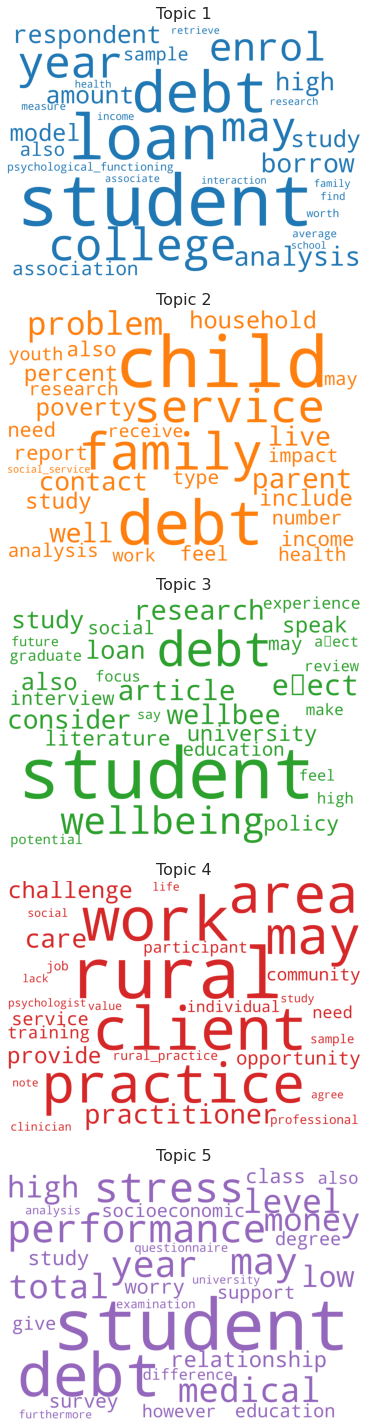

In [57]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, 
                               num_words=30)

fig, axes = plt.subplots(5, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# dorminant word count


In [69]:
corp = corpus[0:13]
corp_cur = corp[13-1] 
topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics] 
word_dominanttopic

[('addition', 6),
 ('address', 6),
 ('adult', 6),
 ('aim', 6),
 ('amount', 6),
 ('analysis', 6),
 ('assess', 6),
 ('associate', 6),
 ('association', 6),
 ('carry', 6),
 ('compare', 6),
 ('conduct', 6),
 ('context', 6),
 ('control', 6),
 ('correlate', 6),
 ('current', 6),
 ('debt', 6),
 ('diagnosis', 6),
 ('economic', 6),
 ('establish', 6),
 ('event', 6),
 ('examine', 6),
 ('experience', 6),
 ('factor', 6),
 ('family', 6),
 ('feeling', 6),
 ('first', 6),
 ('high', 6),
 ('income', 6),
 ('increase', 6),
 ('indebtedness', 6),
 ('indicate', 6),
 ('individual', 6),
 ('interview', 6),
 ('inve', 6),
 ('key', 6),
 ('level', 6),
 ('life', 6),
 ('likely', 6),
 ('mail', 6),
 ('make', 6),
 ('many', 6),
 ('may', 6),
 ('month', 6),
 ('mortgage', 6),
 ('national', 6),
 ('new', 6),
 ('non', 6),
 ('note', 6),
 ('number', 6),
 ('order', 6),
 ('paper', 6),
 ('participant', 6),
 ('pay', 6),
 ('personal', 6),
 ('problem', 6),
 ('range', 6),
 ('rate', 6),
 ('reason', 6),
 ('receive', 6),
 ('recently', 6),
 (

# Topics per document


In [0]:

def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

# Topic Distribution Plot

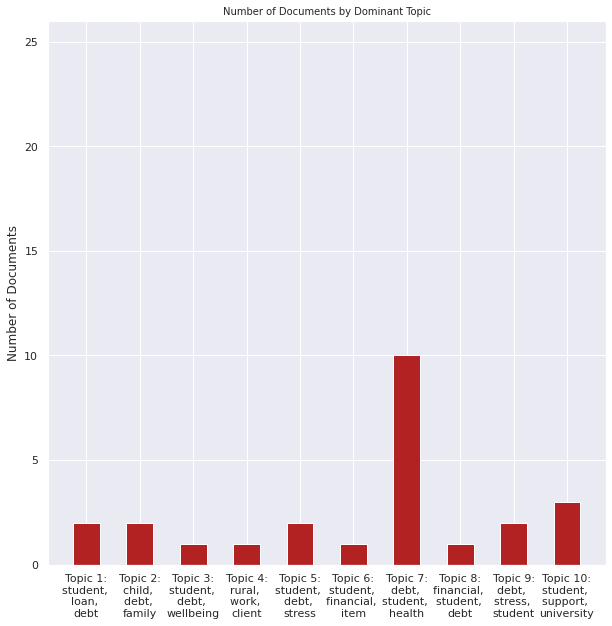

In [71]:
from matplotlib.ticker import FuncFormatter

# Plot

fig, ax1  = plt.subplots(1, figsize=(10, 10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x + 1)+ ':\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 26)

plt.show()

In [72]:
df_dominant_topic_in_each_doc

,Dominant_Topic,count
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2
5,5,1
6,6,10
7,7,1
8,8,2
9,9,3


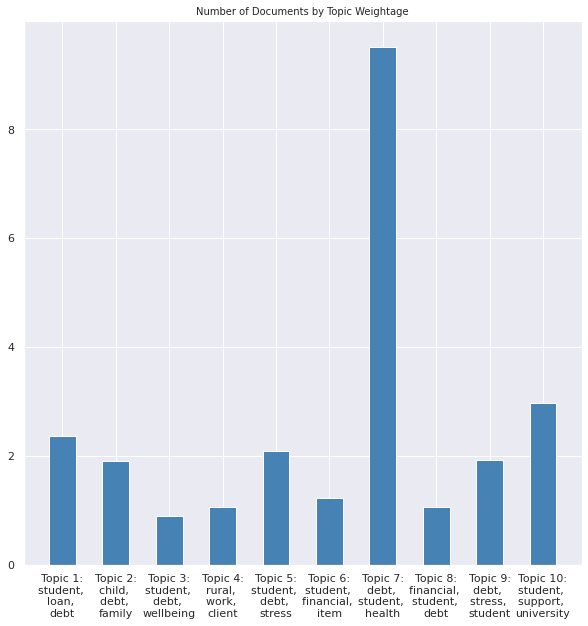

In [73]:
fig, ax2  = plt.subplots(1, figsize=(10, 10))
# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()